<a href="https://colab.research.google.com/github/lizzietsitsishvili/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item':'Spotify', 'Price_2016':4.99, 'Price_2024':5.99},
]
    # ... add 1 more item

In [3]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify: 20.04% Inflation


In [4]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='309643dcfbd5a9a594b6f860e51fd0b2')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
cable_streaming = fred.get_series('CUSR0000SERA02')
food_away = fred.get_series('CUSR0000SEFV')
# ... fetch remaining series

In [13]:
import pandas as pd

df_raw = pd.DataFrame({
    'Official_CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Cable_Streaming': cable_streaming,
    'Food_Away': food_away
})

df_raw = df_raw[df_raw.index >= Base_Date]
df_normalized = (df_raw / df_raw.loc[Base_Date]) * 100
display(df_normalized.head())

,Official_CPI,Tuition,Rent,Cable_Streaming,Food_Away
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.723912,100.138869
2016-03-01,100.180095,100.470288,100.607131,101.450163,100.355827
2016-04-01,100.563850,100.692146,100.924580,101.878663,100.599712
2016-05-01,100.801592,100.929861,101.258485,102.214306,100.813978


In [5]:
Base_Date = '2016-01-01'
Value_Current = official_cpi.iloc[-2]
Value_at_Start_Date = official_cpi.loc[Base_Date]
Value_Index = (Value_Current / Value_at_Start_Date) * 100

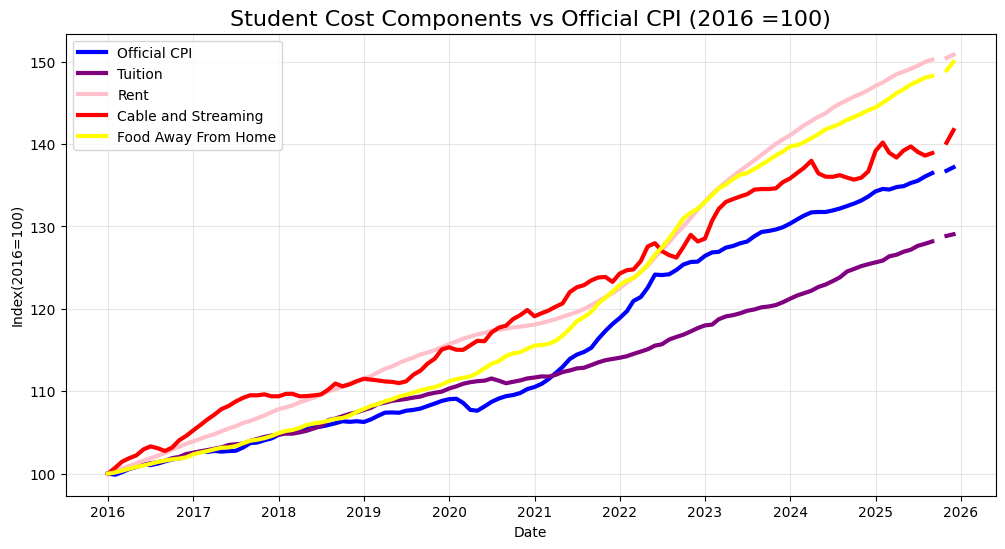

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_normalized.index, df_normalized['Official_CPI'], label='Official CPI', color='blue', linewidth=3)
plt.plot(df_normalized.index, df_normalized['Tuition'], label='Tuition', color='purple', linewidth=3)
plt.plot(df_normalized.index, df_normalized['Rent'], label='Rent', color='pink', linewidth=3)
plt.plot(df_normalized.index, df_normalized['Cable_Streaming'], label='Cable and Streaming', color='red', linewidth=3)
plt.plot(df_normalized.index, df_normalized['Food_Away'], label='Food Away From Home', color='yellow', linewidth=3)

plt.title('Student Cost Components vs Official CPI (2016 =100)', fontsize=16)
plt.ylabel('Index(2016=100)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [1]:
weights = {
    'Tuition': 0.40,
    'Rent': 0.35,
    'Food_Away': 0.15,
    'Cable_Streaming': 0.10
}

In [15]:
df_normalized['Student_SPI'] = (
    df_normalized['Tuition'] * weights['Tuition'] +
    df_normalized['Rent'] * weights['Rent'] +
    df_normalized['Food_Away'] * weights['Food_Away'] +
    df_normalized['Cable_Streaming'] * weights['Cable_Streaming']
)

df_normalized[['Official_CPI', 'Student_SPI']].head()

,Official_CPI,Student_SPI
2016-01-01,100.000000,100.000000
2016-02-01,99.867032,100.299878
2016-03-01,100.180095,100.599001
2016-04-01,100.563850,100.878285
2016-05-01,100.801592,101.155941


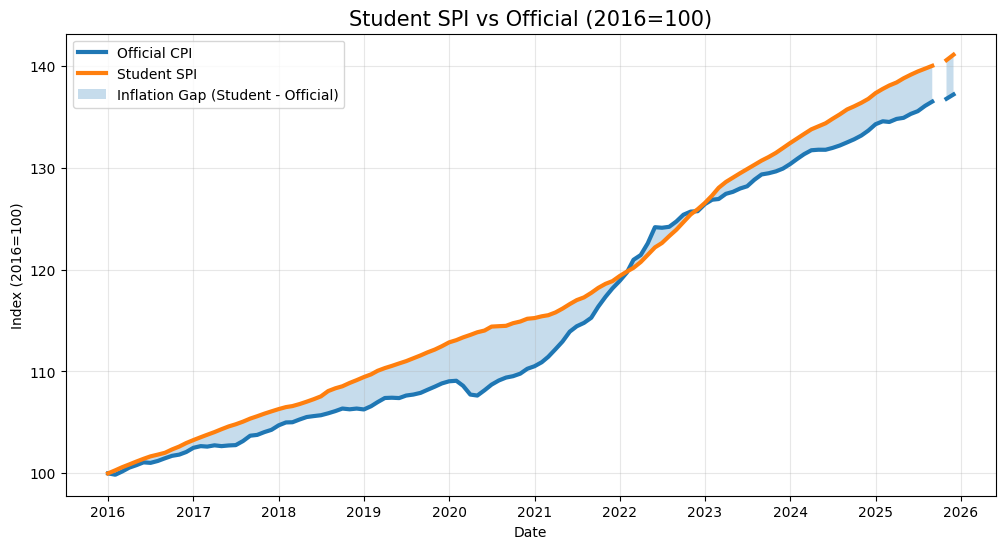

In [19]:
plt.figure(figsize=(12,6))

plt.plot(df_normalized.index, df_normalized['Official_CPI'], label='Official CPI', linewidth=3)
plt.plot(df_normalized.index, df_normalized['Student_SPI'], label='Student SPI', linewidth=3)

plt.fill_between(
    df_normalized.index,
    df_normalized['Official_CPI'],
    df_normalized['Student_SPI'],
    alpha=0.25,
    label='Inflation Gap (Student - Official)'
)

plt.title('Student SPI vs Official (2016=100)', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Index (2016=100)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

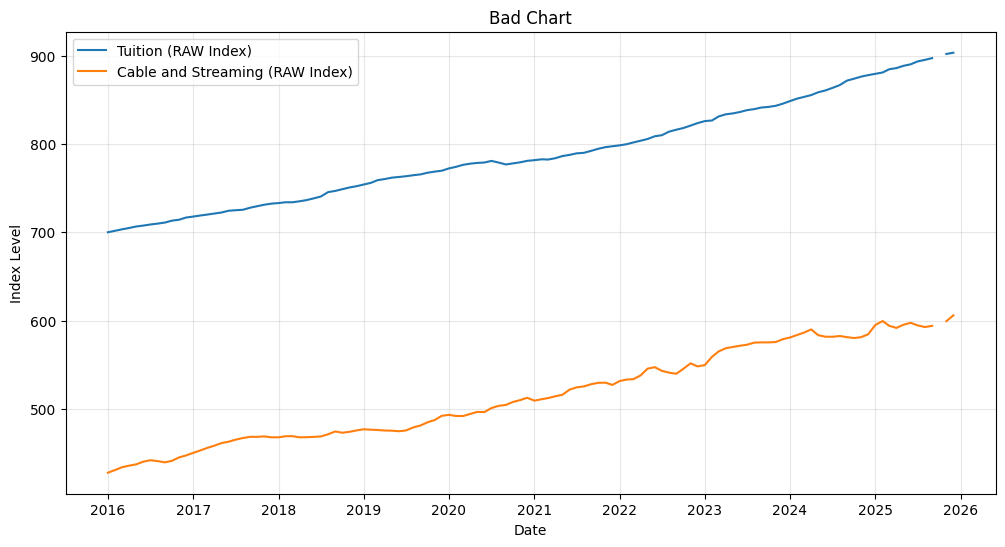

In [22]:
# Bad Chart - raw, non-normalized base years
# Tuition and streaming have different base years which is why we have to rewrite the index as 2016=100

plt.figure(figsize=(12,6))

plt.plot(df_raw.index, df_raw['Tuition'], label= 'Tuition (RAW Index)')
plt.plot(df_raw.index, df_raw ['Cable_Streaming'], label='Cable and Streaming (RAW Index)')

plt.title ('Bad Chart')
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

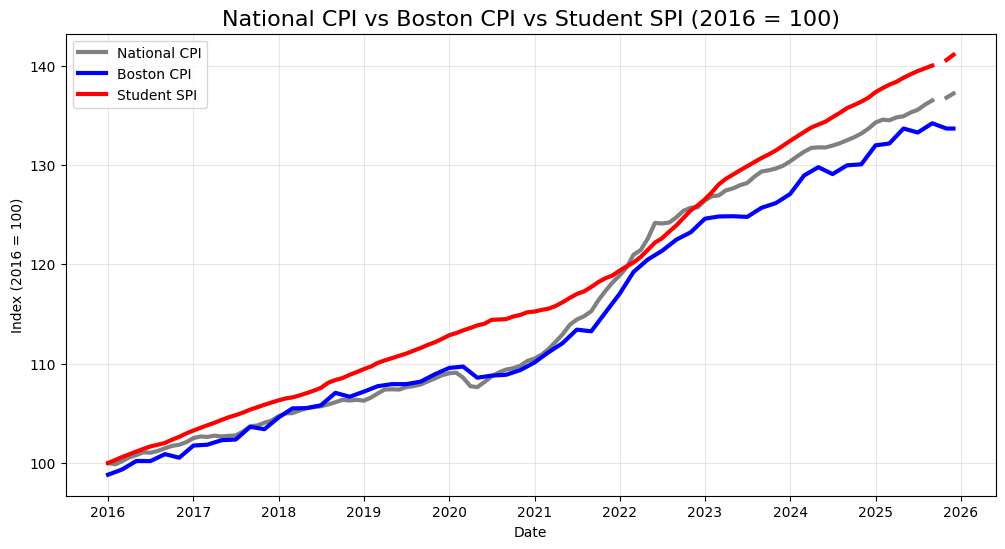

In [25]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# 1) Connect to FRED (put your key here)
fred = Fred(api_key="309643dcfbd5a9a594b6f860e51fd0b2")

# 2) Fetch Boston CPI (monthly)
# FRED code: CUURA103SA0 = CPI-U All Items in Boston-Cambridge-Newton, MA-NH (CBSA)
boston_raw = fred.get_series("CUURA103SA0")  # returns a pandas Series
boston_raw.index = pd.to_datetime(boston_raw.index)
boston_raw = boston_raw.sort_index()

# 3) Normalize Boston CPI to 2016=100 (use the average of 2016 as the base)
boston_2016_mean = boston_raw.loc["2016"].mean()
boston_norm = (boston_raw / boston_2016_mean) * 100
boston_norm.name = "Boston_CPI"

# 4) Merge with your existing df_normalized (df_normalized has Official_CPI and Student_SPI, already normalized)
# Make sure df_normalized index is datetime
plot_df = df_normalized.copy()
plot_df.index = pd.to_datetime(plot_df.index)
plot_df = plot_df.sort_index()

# Join and handle missing frequency differences
plot_df = plot_df.join(boston_norm, how="left")

# If Boston has some missing months relative to plot_df, fill them smoothly
# (time interpolation works well for monthly-ish macro series)
plot_df["Boston_CPI"] = plot_df["Boston_CPI"].interpolate(method="time")

# 5) Plot three lines
plt.figure(figsize=(12, 6))

plt.plot(plot_df.index, plot_df["Official_CPI"], label="National CPI", linewidth=3, color="grey")
plt.plot(plot_df.index, plot_df["Boston_CPI"], label="Boston CPI", linewidth=3, color="blue")
plt.plot(plot_df.index, plot_df["Student_SPI"], label="Student SPI", linewidth=3, color="red")

plt.title("National CPI vs Boston CPI vs Student SPI (2016 = 100)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Index (2016 = 100)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()